In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
#loading train dataset
df = pd.read_csv('train.csv')

In [3]:
#Applying Classifier 1 means negative, 0 means positive 
releventDf = df.loc[:,['comment_text','insult','identity_hate','threat','severe_toxic','obscene','toxic']]
classifier = [0]*len(releventDf)
for i in range(0,len(releventDf)):
    if releventDf['insult'][i] or releventDf['identity_hate'][i] or releventDf['threat'][i] or releventDf['severe_toxic'][i] or releventDf['obscene'][i] or releventDf['toxic'][i]:
        classifier[i]=1
releventDf['classifier']= classifier
releventDf.head(100)

,comment_text,insult,identity_hate,threat,severe_toxic,obscene,toxic,classifier
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95,"""\n\nThanks. I can see that violating clearly ...",0,0,0,0,0,0,0
96,"""\nHi\nThanks for our kind words. See you arou...",0,0,0,0,0,0,0
97,Collusion in poker \n\nThis is regarded as mos...,0,0,0,0,0,0,0
98,"Thanks much - however, if it's been resolved, ...",0,0,0,0,0,0,0


In [4]:
#Saving the dataframe 
# os.makedirs('C:/Users/PC/Desktop/Project', exist_ok=True)
# textClassifierDf.to_csv('C:/Users/PC/Desktop/Project/fixedDF.csv',index=False)

### Ready Dataset , saving it

In [5]:
#Creating Text -> Classifier DataSet
import os

textClassifierDf = releventDf.loc[:,['comment_text','classifier']]
textClassifierDf.head(100)

,comment_text,classifier
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
95,"""\n\nThanks. I can see that violating clearly ...",0
96,"""\nHi\nThanks for our kind words. See you arou...",0
97,Collusion in poker \n\nThis is regarded as mos...,0
98,"Thanks much - however, if it's been resolved, ...",0


In [6]:
pd.set_option('display.max_colwidth', None)


In [7]:
textClassifierDf.loc[98]

comment_text    Thanks much - however, if it's been resolved, why is it that today, when I didn't write anything in edit summary, CAMERA put its ad in my edit summary box?1equalvoice1 (talk)
classifier                                                                                                                                                                                   0
Name: 98, dtype: object

In [8]:
contractions_dict = { "ain\'t": "are not", "he\'s":"he is", "it\'s":"it is","she\'s":"she is", "aren\'t": "are not", "can\'t": "cannot", "can\'t\'ve": "cannot have", "\'cause": "because", "could\'ve": "could have", "couldn\'t": "could not", "couldn\'t\'ve": "could not have", "didn\'t": "did not", "doesn\'t": "does not", "don\'t": "do not", "hadn\'t": "had not", "hadn\'t\'ve": "had not have", "hasn\'t": "has not", "haven\'t": "have not", "he\'d": "he would", "he\'d\'ve": "he would have", "he\'ll": "he will", "he\'ll\'ve": "he will have", "how\'d": "how did", "how\'d\'y": "how do you", "how\'ll": "how will", "I\'d": "I would", "I\'d\'ve": "I would have", "I\'ll": "I will", "I\'ll\'ve": "I will have", "I\'m": "I am", "I\'ve": "I have", "isn\'t": "is not", "it\'d": "it would", "it\'d\'ve": "it would have", "it\'ll": "it will", "it\'ll\'ve": "it will have", "let\'s": "let us", "ma\'am": "madam", "mayn\'t": "may not", "might\'ve": "might have", "mightn\'t": "might not", "mightn\'t\'ve": "might not have", "must\'ve": "must have", "mustn\'t": "must not", "mustn\'t\'ve": "must not have", "needn\'t": "need not", "needn\'t\'ve": "need not have", "o\'clock": "of the clock", "oughtn\'t": "ought not", "oughtn\'t\'ve": "ought not have", "shan\'t": "shall not", "sha\'n\'t": "shall not", "shan\'t\'ve": "shall not have", "she\'d": "she would", "she\'d\'ve": "she would have", "she\'ll": "she will", "she\'ll\'ve": "she will have", "should\'ve": "should have", "shouldn\'t": "should not", "shouldn\'t\'ve": "should not have", "so\'ve": "so have", "that\'d": "that would", "that\'d\'ve": "that would have", "there\'d": "there would", "there\'d\'ve": "there would have", "they\'d": "they would", "they\'d\'ve": "they would have","they\'ll": "they will",
 "they\'ll\'ve": "they will have", "they\'re": "they are", "they\'ve": "they have", "to\'ve": "to have", "wasn\'t": "was not", "we\'d": "we would", "we\'d\'ve": "we would have", "we\'ll": "we will", "we\'ll\'ve": "we will have", "we\'re": "we are", "we\'ve": "we have", "weren\'t": "were not","what\'ll": "what will", "what\'ll\'ve": "what will have", "what\'re": "what are", "what\'ve": "what have", "when\'ve": "when have", "where\'d": "where did", "where\'ve": "where have",
 "who\'ll": "who will", "who\'ll\'ve": "who will have", "who\'ve": "who have", "why\'ve": "why have", "will\'ve": "will have", "won\'t": "will not", "won\'t\'ve": "will not have", "would\'ve": "would have", "wouldn\'t": "would not", "wouldn\'t\'ve": "would not have", "y\'all": "you all", "y\'all\'d": "you all would", "y\'all\'d\'ve": "you all would have", "y\'all\'re": "you all are", "y\'all\'ve": "you all have", "you\'d": "you would", "you\'d\'ve": "you would have", "you\'ll": "you will", "you\'ll\'ve": "you will have", "you\'re": "you are", "you\'ve": "you have"}
#works without \ aswell



### Clean text and punctuation

In [9]:
import re
#Preprosessing

#Expanding contractions
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict =contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

#Cleaning the text
def clean_text(text):
    text=text.lower() #get text to lowercase
    
    text = re.sub(r'[^a-z A-Z\']' , ' ',text)
    
    #expand contractions (we'll -> we will)
    text = expand_contractions(text)
    
    #remove ' , 's
    text = re.sub('\'s' , ' ',text)
    text = re.sub('\'' , ' ',text)
    
    text = re.sub(" +", " ", text) #remove unnecessary spaces
    text = "".join(text.rstrip().lstrip())
    
    return text

#text before change
# print(textClassifierDf['comment_text'][10])

# print("------------------------")

# #text after change 
# cleaned_text = clean_text(str(textClassifierDf['comment_text'][10]))
# print(cleaned_text)

### Tokenization and Serialization

In [10]:
#applying cleaned text to dataset?
PreprocessedTrainArr = []
dfLen = len(textClassifierDf)
for i in range(0,dfLen):
    if(i%50000==0):
        print(i)
    cleaned_text_train=clean_text(textClassifierDf['comment_text'][i])
    #tokenized_list = tokenize(cleaned_text)
    #preprocessed_text = pad(tokenized_list)
    PreprocessedTrainArr.append(cleaned_text_train)
PreprocessedTrainArr

0
50000
100000
150000


['explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i m retired now',
 'd aww he matches this background colour i m seemingly stuck with thanks talk january utc',
 'hey man i m really not trying to edit war it is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info',
 'more i cannot make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know ther

In [11]:
#Tokenization #cleaned_text
from keras.preprocessing.text import Tokenizer

max_features=100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(PreprocessedTrainArr))

In [12]:
list_tokenized_train = tokenizer.texts_to_sequences(PreprocessedTrainArr)
list_tokenized_train

[[653,
  76,
  1,
  125,
  128,
  176,
  30,
  641,
  4246,
  10833,
  985,
  85,
  326,
  48,
  85,
  12,
  11004,
  52,
  6513,
  15,
  59,
  2623,
  147,
  3,
  2801,
  34,
  116,
  1146,
  14642,
  2662,
  5,
  46,
  21,
  12,
  238,
  1,
  355,
  32,
  1,
  35,
  29,
  142,
  3,
  66,
  3214,
  88],
 [177,
  15887,
  49,
  2498,
  14,
  539,
  3599,
  3,
  66,
  4310,
  2586,
  22,
  93,
  35,
  934,
  181],
 [399,
  408,
  3,
  66,
  132,
  12,
  244,
  2,
  74,
  305,
  10,
  8,
  52,
  9,
  14,
  577,
  8,
  2177,
  481,
  491,
  102,
  5,
  585,
  2,
  36,
  322,
  125,
  354,
  4,
  30,
  35,
  29,
  49,
  207,
  2,
  421,
  58,
  37,
  1,
  2271,
  92,
  1,
  703,
  456],
 [58,
  3,
  145,
  96,
  56,
  323,
  1374,
  15,
  2007,
  3,
  5683,
  23,
  1,
  121,
  2366,
  55,
  17,
  500,
  15,
  26,
  7,
  4015,
  4,
  1251,
  4,
  9126,
  3,
  68,
  1,
  270,
  86,
  120,
  12793,
  38,
  9,
  48,
  16,
  44,
  11,
  1,
  1397,
  137,
  1193,
  1996,
  410,
  1193,
  313,
  

### Padding

In [13]:
import keras.preprocessing.sequence as sq

X_tr=sq.pad_sequences(list_tokenized_train, maxlen=200, padding = 'post')

X_tr

array([[  653,    76,     1, ...,     0,     0,     0],
       [  177, 15887,    49, ...,     0,     0,     0],
       [  399,   408,     3, ...,     0,     0,     0],
       ...,
       [29999,  6969,  4889, ...,     0,     0,     0],
       [    5,    10,   553, ...,     0,     0,     0],
       [    5,     3,   132, ...,     0,     0,     0]])

In [14]:
Y_tr = textClassifierDf['classifier'].to_numpy()
Y_tr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Working On Test&Test_lables -------------------------------------------

### Loading test , test labels

In [15]:
#load test dataframe labels
df_test_labels = pd.read_csv('test_labels.csv')
df_test = pd.read_csv('test.csv')
len(df_test)
df_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


### Joining test&test_labels and removing -1 lines

In [16]:
joined_test_df = df_test_labels.set_index('id').join(df_test.set_index('id'))
joined_test_df.head(10)
fixed_test_df = joined_test_df[joined_test_df.toxic!=-1]
fixed_test_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
id,,,,,,,
0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding. I think very highly of you and would not revert without discussion.
000247e83dcc1211,0,0,0,0,0,0,:Dear god this site is horrible.
0002f87b16116a7f,0,0,0,0,0,0,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """
0003e1cccfd5a40a,0,0,0,0,0,0,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case."""
00059ace3e3e9a53,0,0,0,0,0,0,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history."""
...,...,...,...,...,...,...,...
fff8f64043129fa2,0,0,0,0,0,0,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect."
fff9d70fe0722906,0,0,0,0,0,0,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.
fffa8a11c4378854,0,0,0,0,0,0,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...


### Making test DF -> Comment_text,Classifier

In [17]:
#Applying Classifier 1 means negative, 0 means positive 
releventTestDf = fixed_test_df.loc[:,['comment_text','insult','identity_hate','threat','severe_toxic','obscene','toxic']]
classifier = [0]*len(releventTestDf)
for i in range(0,len(releventTestDf)):
    if releventTestDf['insult'][i] or releventTestDf['identity_hate'][i] or releventTestDf['threat'][i] or releventTestDf['severe_toxic'][i] or releventTestDf['obscene'][i] or releventTestDf['toxic'][i]:
        classifier[i]=1
releventTestDf['classifier']= classifier
releventTestDf.head(100)

,comment_text,insult,identity_hate,threat,severe_toxic,obscene,toxic,classifier
id,,,,,,,,
0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0,0,0,0,0,0
000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0,0
0002f87b16116a7f,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,0,0,0,0,0,0,0
0003e1cccfd5a40a,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0,0,0,0,0,0
00059ace3e3e9a53,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
0065324079670f4d,""" \n\n P.S. IMHO, this all falls under the category created by on her talk page, which she appropriately refers to as """"loopy talk page discussions/scoldings."""" """,0,0,0,0,0,0,0
006622a9f635ace3,REDIRECT Talk:Ponhook Lake 10,0,0,0,0,0,0,0
0069e74a5302bf10,""" \n\n ===Use of """"Nepal Bhasa""""=== \n The term """"Nepal Bhasa"""" is used in English, officially as well as commonly. Here are some examples and facts about its use- \n * Google ngram search shows that Nepal Bhasha has exceeded the use of Newar language here. \n * Government of Nepal (see picture of news about the Government's stance is there in the page itself) \n * Nepal Bhasa Academy (in its publications and awards) \n * Nepal Bhasa Parishad (in its publications and awards) \n * World Newah Organization (examples of use in page 2,3 and 7) \n * Central Department of Nepal Bhasa, Tribhuwan University, the only university with curriculum in Nepal Bhasa (News about scholarship in Nepal Bhasa) \n * Nepa Pasa Pucha America-ye (An example see page 9) \n * Pasa Pucha Guthi UK (An example) \n * Rising Nepal daily (Example) \n * Dharmodaya Sabha, the national Buddhist organization of Nepal (The publications in the language are listed as Nepal Bhasa) \n * Asha Archives, the biggest archive of Nepal Bhasa literature (Website) \n * Journal of Lumbini Buddha Dharma Society (Example) \n * Journal of Newar Studies (An example \n * Archive of English essay about Tipitaka translation project in Nepal Bhasa (they have been publishing various segments of Tipitaka in Nepal Bhasa) \n * Lotus research center Activities in Nepal Bhasa \n * English-Nepal Bhasa dictionary in Amazon \n * Mobile phone Nepal Bhasa dictionary app \n * Matina international website \n * Miss Newa (Miss best Nepal Bhasa is one of the categories, Official website with contestants talking about Nepal BhasaTHT news about using Nepal Bhasa) \n * Nepalmandal.com, one of the very few websites in Nepal Bhasa, stating their objectives regarding Nepal Bhasa \n * Image Channel Nepal Bhasa section \n Thank you """,0,0,0,0,0,0,0


In [18]:
text_classifier_test_df = releventTestDf.loc[:,['comment_text','classifier']]
text_classifier_test_df.tail(10)

,comment_text,classifier
id,,
fff69311f306df44,Balancing the two approaches to psychiatry ( biological and psychological ) is always difficult. Also psychiatric disorders are of unknown cause / pathophysiology.,0
fff7159b3ee95618,"== Your name mentioned == \n Hi, I just thought of letting you know that you are mentioned by Ariana310 at here and here",0
fff718ffe5f05559,"I've just discovered yet another list: List of composers by name, an undifferentiated list of mostly 20th-century names. We don't need all these lists and they're impossible to maintain! There's also List of modernist composers, and List of acousmatic-music composers, as well as the more specialised List of 20th century Mexican composers and the List of female composers in the United States during the 20th century that I've mentioned before. But my favourite bizarre specialised list must be List of composers who employed pipe music.",0
fff83b80284d8440,::Consensus for ruining Wikipedia? I think that can be ignored.,0
fff8f521a7dbcd47,shut down the mexican border withought looking bad.,0
fff8f64043129fa2,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0
fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0
fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0
fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,1


### Test Preprocessing

In [19]:
#clean text and create array
PreprocessedTestArr = []
dfLen = len(text_classifier_test_df)
for i in range(0,dfLen):
    if(i%50000==0):
        print(i)
    cleaned_text_test=clean_text(text_classifier_test_df['comment_text'][i])
    PreprocessedTestArr.append(cleaned_text_test)
# PreprocessedTestArr

0
50000


In [20]:
#Tokenize
list_tokenized_test = tokenizer.texts_to_sequences(PreprocessedTestArr)
list_tokenized_test

[[127, 6, 13, 1037, 3, 68, 101, 1044, 4, 6, 5, 43, 12, 350, 173, 133],
 [996, 507, 14, 288, 8, 3143],
 [1165,
  41,
  14902,
  274,
  2,
  148,
  983,
  132,
  6,
  272,
  1,
  108,
  72,
  19,
  14902,
  1246,
  293,
  983,
  2,
  1,
  5430,
  17442,
  1027,
  5,
  76,
  21,
  6,
  1427,
  2674,
  77,
  1,
  246,
  1016,
  544,
  273,
  6453,
  5356,
  253,
  6,
  16,
  52,
  265,
  77,
  1368,
  15,
  1,
  3848,
  13,
  2211,
  1,
  78,
  3894,
  10560,
  11,
  1,
  661,
  14411,
  8501,
  24,
  9,
  49,
  8,
  796,
  752,
  8,
  11,
  1,
  1147],
 [10,
  283,
  10,
  143,
  40,
  9,
  10,
  8,
  7,
  677,
  1,
  677,
  4,
  3774,
  8,
  629,
  11,
  14,
  193,
  69,
  40,
  16,
  394,
  3202,
  4,
  39001,
  1839,
  704,
  7019,
  5,
  11627,
  11654,
  4316,
  281,
  6664,
  476,
  6664,
  10,
  8,
  629,
  11,
  14,
  193,
  2,
  1748,
  9,
  17867,
  8,
  7,
  39001,
  1485,
  10,
  283,
  10,
  94,
  11,
  75381,
  704,
  704,
  34,
  13412,
  281,
  704,
  4,
  116,
  1146,
  5

In [21]:
#pad
X_test=sq.pad_sequences(list_tokenized_test, maxlen=200, padding = 'post')
print(X_test)

[[  127     6    13 ...     0     0     0]
 [  996   507    14 ...     0     0     0]
 [ 1165    41 14902 ...     0     0     0]
 ...
 [ 2159    15     6 ...     0     0     0]
 [ 5816  6038     8 ...     0     0     0]
 [23628 31925  4057 ...     0     0     0]]


In [22]:
Y_test = text_classifier_test_df['classifier'].to_numpy()
Y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Preparing The Model

In [23]:
val_split = 0.2
num_validation_samples = int(val_split*X_tr.shape[0])

X_train = X_tr[: -num_validation_samples]
Y_train = Y_tr[: -num_validation_samples]

x_val = X_tr[-num_validation_samples: ]
y_val = Y_tr[-num_validation_samples: ]


In [24]:
word_index = tokenizer.word_index

word_index

{'the': 1,
 'to': 2,
 'i': 3,
 'of': 4,
 'and': 5,
 'you': 6,
 'a': 7,
 'is': 8,
 'that': 9,
 'it': 10,
 'in': 11,
 'not': 12,
 'for': 13,
 'this': 14,
 'on': 15,
 'are': 16,
 'be': 17,
 'as': 18,
 'have': 19,
 'your': 20,
 'do': 21,
 'with': 22,
 'if': 23,
 'article': 24,
 'was': 25,
 'or': 26,
 'but': 27,
 'wikipedia': 28,
 'page': 29,
 'my': 30,
 'an': 31,
 'from': 32,
 'by': 33,
 'at': 34,
 'talk': 35,
 'me': 36,
 'about': 37,
 'so': 38,
 'what': 39,
 'there': 40,
 'will': 41,
 'can': 42,
 'would': 43,
 'all': 44,
 'has': 45,
 'please': 46,
 'no': 47,
 'they': 48,
 'he': 49,
 'one': 50,
 'like': 51,
 'just': 52,
 'we': 53,
 'which': 54,
 'should': 55,
 'any': 56,
 'been': 57,
 'more': 58,
 'some': 59,
 'other': 60,
 'here': 61,
 'who': 62,
 'see': 63,
 'also': 64,
 'his': 65,
 'm': 66,
 'did': 67,
 'think': 68,
 'because': 69,
 'know': 70,
 'how': 71,
 'people': 72,
 'am': 73,
 'edit': 74,
 'does': 75,
 'why': 76,
 'up': 77,
 'only': 78,
 'out': 79,
 'articles': 80,
 'use': 81,
 'w

In [33]:
import numpy as np
embedding_dim_fasttext = 300
embeddings_index_fasttext = {}
f = open('wiki-news-300d-1M.vec', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')
f.close()

embedding_matrix_fasttext = np.random.random((len(word_index) + 1, embedding_dim_fasttext))
for word, i in word_index.items():
    embedding_vector = embeddings_index_fasttext.get(word)
    if embedding_vector is not None:
        embedding_matrix_fasttext[i] = embedding_vector

In [42]:
maxpadlen=200
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=len(word_index) + 1,
        output_dim=embedding_dim_fasttext,
        weights = [embedding_matrix_fasttext],
        input_length = maxpadlen,
        trainable=False,
        ),
    tf.keras.layers.LSTM(64,return_sequences=True),
    #tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [51]:
model_info = model.fit(X_train,Y_train, epochs=30, batch_size=32,
                    validation_data=(x_val,y_val))

Epoch 1/30
3990/3990 [==============================] - 254s 64ms/step - loss: 0.0898 - accuracy: 0.9654 - val_loss: 0.0949 - val_accuracy: 0.9641
Epoch 2/30
3990/3990 [==============================] - 208s 52ms/step - loss: 0.0889 - accuracy: 0.9656 - val_loss: 0.0968 - val_accuracy: 0.9633
Epoch 3/30
3990/3990 [==============================] - 223s 56ms/step - loss: 0.0880 - accuracy: 0.9665 - val_loss: 0.0948 - val_accuracy: 0.9638
Epoch 4/30
3990/3990 [==============================] - 229s 57ms/step - loss: 0.0865 - accuracy: 0.9672 - val_loss: 0.0962 - val_accuracy: 0.9641
Epoch 5/30
3990/3990 [==============================] - 226s 57ms/step - loss: 0.0852 - accuracy: 0.9672 - val_loss: 0.0953 - val_accuracy: 0.9639
Epoch 6/30
3990/3990 [==============================] - 206s 52ms/step - loss: 0.0840 - accuracy: 0.9674 - val_loss: 0.0946 - val_accuracy: 0.9647
Epoch 7/30
3990/3990 [==============================] - 210s 53ms/step - loss: 0.0830 - accuracy: 0.9682 - val_loss: 0

In [29]:
#loading model #########-----------#########

import keras
model = keras.models.load_model('model_final_30epochs')

In [54]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("loss:", score[0])
print("accuracy:", score[1])
#plot(epochs,final)
predictions = model.predict(X_test)
print("finish")


loss: 0.2570611834526062
accuracy: 0.9107193350791931
finish


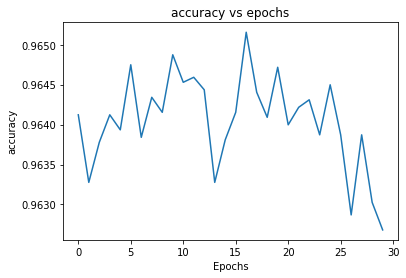

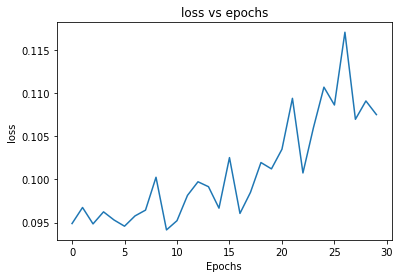

In [55]:
import matplotlib.pyplot as plt

def plot(e,h):
    i=0
    temp = np.zeros([ e ])
    while(i< e ):
        temp[i]=i
        i = i+1
    plt.plot(temp,h.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.title('accuracy vs epochs')
    plt.show()
    plt.plot(temp,h.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('loss vs epochs')
    plt.show()

epochs = 30

plot(epochs,model_info)
